In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sehriyarmemmedli/binaaz-sale-project")

print("Path to dataset files:", path)

100%|██████████| 39.8M/39.8M [00:00<00:00, 46.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sehriyarmemmedli/binaaz-sale-project/versions/1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df= pd.read_csv(path + '/house_sale.csv')
df.head()

,id_x,rel_url,estate_rel_url_x,datetime_scrape_x,price,currency_x,location,attributes,city_when,city,...,Mərtəbə,Otaq sayı,Sahə,Torpaq sahəsi,Təmir,Çıxarış,İpoteka,estate_details_id_y,estate_rel_url,extra_info
0,5df36281-6dc6-4d5d-89a7-5fcfa86f7608,/alqi-satqi?page=174,/items/4521724,2024-10-05 22:07:37.60613+00,499999.0,AZN,Səbail r.,"4 otaqlı, 145 m², 7/9 mərtəbə","Bakı, dünən 23:52",bakı,...,7 / 9,4.0,145 m²,NaN,var,var,NaN,92e82ea2-e1f3-4c2d-a284-151efd99281e,/items/4521724,Şəhidlər xiyabanı * Dağüstü parkı * Səbail r.
1,883e20f0-8872-49a5-8b4b-63b8301b5f8f,/alqi-satqi?page=250,/items/4669294,2024-10-05 22:07:37.60613+00,77000.0,AZN,Biləcəri q.,"4 otaqlı, 90 m²","Bakı, dünən 23:56",bakı,...,NaN,4.0,90 m²,1.3 sot,var,yoxdur,NaN,505eaf81-6bc8-4094-9b00-aa82066548ee,/items/4669294,Binəqədi r.* Biləcəri q.
2,55c36fb1-a3af-476e-ba17-a81f6795be8d,/alqi-satqi?page=250,/items/4669293,2024-10-05 22:07:37.60613+00,92000.0,AZN,İnşaatçılar m.,"3 otaqlı, 60 m²","Bakı, dünən 23:55",bakı,...,NaN,3.0,60 m²,0.1 sot,var,var,NaN,fa63b201-999d-43b5-a61a-778d9d79a6c6,/items/4669293,İnşaatçılar m.* Yasamal r.
3,acf1aa8d-a46a-40f5-b6f2-f7a449569337,/alqi-satqi?page=250,/items/4647811,2024-10-05 22:07:37.60613+00,95000.0,AZN,Qaraçuxur q.,130 m²,"Bakı, dünən 23:55",bakı,...,NaN,NaN,130 m²,NaN,var,var,var,5db56980-05cc-4925-b55b-f58fb3f4d2b6,/items/4647811,Suraxanı r.* Qaraçuxur q.
4,22d840df-9283-4112-bc71-7432511fc776,/alqi-satqi?page=250,/items/4638863,2024-10-05 22:07:37.60613+00,220000.0,AZN,Əhmədli m.,"3 otaqlı, 100 m², 15/16 mərtəbə","Bakı, dünən 23:52",bakı,...,15 / 16,3.0,100 m²,NaN,var,var,NaN,d71cf9a9-86dd-4162-b540-6252a8659a09,/items/4638863,Əhmədli m.* Xalqlar Dostluğu m.* Xətai r.* Əhm...


In [ ]:
df = df.drop_duplicates(subset = ['estate_rel_url_x'], keep ='last')

In [ ]:
#1st part
df = df.drop(columns = ['id_x', 'rel_url', 'estate_rel_url_x', 'datetime_scrape_x', 'city_when',
                   'img_url', 'id_y', 'estate_id','estate_rel_url_y', 'datetime_scrape_y', 'description', 'currency_y', 'owner_name', 'shop_title', 'updated', 'day_y', 'hour_y',
                   'views', 'estate_details_id_x', 'Binanın növü', 'estate_details_id_y', 'estate_rel_url', 'extra_info', 'attributes','day_x','hour_x'], axis = 1)

In [ ]:
#2nd part
df = df.drop(columns = ['shop_name', 'İpoteka', 'repair', 'bill_of_sale', 'address', 'currency_x','price'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64454 entries, 1 to 100774
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        64454 non-null  object 
 1   city            64454 non-null  object 
 2   vip             3922 non-null   object 
 3   featured        1431 non-null   object 
 4   products_label  45301 non-null  object 
 5   mortgage        21056 non-null  object 
 6   unit_price      48820 non-null  object 
 7   total_price     64454 non-null  float64
 8   owner_title     64118 non-null  object 
 9   lat             64454 non-null  float64
 10  lng             64454 non-null  float64
 11  Kateqoriya      64454 non-null  object 
 12  Mərtəbə         48820 non-null  object 
 13  Otaq sayı       58360 non-null  float64
 14  Sahə            64454 non-null  object 
 15  Torpaq sahəsi   9632 non-null   object 
 16  Təmir           60462 non-null  object 
 17  Çıxarış         64454 non-null  obj

In [ ]:
df.loc[df['Çıxarış'].isna(), 'Torpaq sahəsi'].value_counts()


,count
Torpaq sahəsi,


In [ ]:
df.groupby('Kateqoriya')['Torpaq sahəsi'].value_counts()


Kateqoriya         Torpaq sahəsi
Həyət evi/Bağ evi  3 sot            1011
                   2 sot             909
                   6 sot             881
                   4 sot             808
                   5 sot             663
                                    ... 
                   8.4 sot             1
                   8.6 sot             1
                   9.3 sot             1
                   9.8 sot             1
                   95 sot              1
Name: count, Length: 188, dtype: int64

In [ ]:
df = df[df['Kateqoriya'] != 'Həyət evi/Bağ evi']


In [ ]:
df = df.drop(columns='Torpaq sahəsi',axis = 1)  # Drop the column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54822 entries, 4 to 100774
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        54822 non-null  object 
 1   city            54822 non-null  object 
 2   vip             3304 non-null   object 
 3   featured        1216 non-null   object 
 4   products_label  39760 non-null  object 
 5   mortgage        18619 non-null  object 
 6   unit_price      48820 non-null  object 
 7   total_price     54822 non-null  float64
 8   owner_title     54492 non-null  object 
 9   lat             54822 non-null  float64
 10  lng             54822 non-null  float64
 11  Kateqoriya      54822 non-null  object 
 12  Mərtəbə         48820 non-null  object 
 13  Otaq sayı       48921 non-null  float64
 14  Sahə            54822 non-null  object 
 15  Təmir           51066 non-null  object 
 16  Çıxarış         54822 non-null  object 
dtypes: float64(4), object(13)
memory us

In [ ]:
df['products_label'].value_counts()

,count
products_label,
Agentlik,39436
Kompleks,324


In [ ]:
df['owner_title'].value_counts()

,count
owner_title,
vasitəçi (agent),49349
mülkiyyətçi,5143


In [ ]:
df['products_label'][df['owner_title'].isna()].value_counts()

,count
products_label,
Kompleks,324
Agentlik,6


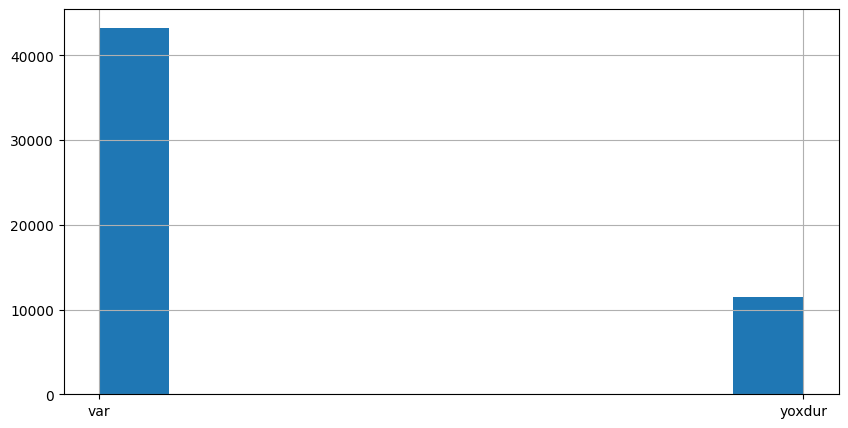

In [ ]:
import matplotlib.pyplot as plt
df['Çıxarış'].isna().sum() # There is no null value in out target
df['Çıxarış'].hist(figsize=(10,5))
plt.show()

Here we can see our dataset is imbalance


In [ ]:
df['Kateqoriya'][df['Mərtəbə'].isna()].value_counts() #Land or office dont have floor so we will fill them with 1

,count
Kateqoriya,
Torpaq,3315
Obyekt,2526
Ofis,101
Qaraj,60


In [ ]:
df['Mərtəbə'].value_counts() #There is also outliers here because some numbers do not looks realistic
#Also we will divide this column 2 parts as max_floor and current_floor
#I think they will be useful


,count
Mərtəbə,
5 / 5,1336
2 / 5,1189
3 / 5,1187
4 / 5,1102
8 / 9,890
...,...
1 / 32,1
1 / 23,1
21 / 25,1


In [ ]:
df['Kateqoriya'][df['Otaq sayı'].isna()].value_counts() #Here we can see the reason is quiete logically , we will fill them with 0

,count
Kateqoriya,
Torpaq,3315
Obyekt,2526
Qaraj,60


In [ ]:
df['Otaq sayı'].value_counts() #Some number of rooms do not look realistic, so I thought them as outlier

,count
Otaq sayı,
3.0,21467
2.0,17611
4.0,6515
1.0,1687
5.0,1295
6.0,187
7.0,58
8.0,46
10.0,18


In [ ]:
df.drop(df[df['Otaq sayı'] > 10].index, inplace=True)

In [ ]:
df['Kateqoriya'][df['Təmir'].isna()].value_counts() # We will fill this nulls with value 'yoxdur', because most part of data is land and its quiete normal
# So i will consider the reamaing nulls as also 'yoxdur'

,count
Kateqoriya,
Torpaq,3315
Yeni tikili,221
Köhnə tikili,89
Obyekt,66
Qaraj,60
Ofis,4


In [ ]:
df['vip'].value_counts() #There also coluns like vip ex(featured, Temir). I consider null values as 0 and i will encode them as 0

,count
vip,
vipped,3301


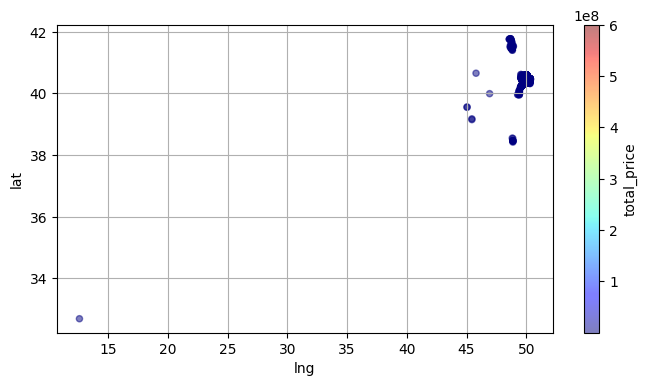

In [ ]:
df.plot(kind = 'scatter', x = 'lng', y = 'lat', alpha = 0.5, c = 'total_price', cmap = plt.get_cmap('jet'), grid = True, figsize = (8, 4))
plt.show()

In [ ]:
#Our dataset is generally contains houses,buildings which are in azerbaijan.So as you see there is outliers in this graph, after our reserches we found that
#Azerbaijan's longtitude and latitude. We also round them for mathematically comfort for our machine


In [ ]:
df ['lat'] = df['lat'].round(3)
df['lat'].round(3).value_counts()

,count
lat,
40.383,1688
40.380,1536
40.394,1409
40.398,1350
40.409,1340
...,...
40.223,1
39.960,1
41.479,1


In [ ]:
df['lng'] = df['lng'].round(3)
df['lng'].value_counts()

,count
lng,
49.809,948
49.864,905
49.953,798
49.816,787
49.954,765
...,...
49.418,1
48.744,1
48.589,1


In [ ]:
df['lng'].describe()

,lng
count,54801.000000
mean,49.867317
std,0.186899
min,12.592000
25%,49.816000
50%,49.847000
75%,49.934000
max,50.341000


In [ ]:
df = df[(df['lng'] >= 44.0) & (df['lng'] <= 51.0)] #Azerbaijan's longitude

In [ ]:
df['lng'].describe()

,lng
count,54800.000000
mean,49.867997
std,0.097858
min,45.040000
25%,49.816000
50%,49.847000
75%,49.934000
max,50.341000


In [ ]:
df = df[(df['lat'] >= 38.0) & (df['lat'] <= 43.0)] #Azerbaijan's latitude

In [ ]:
df['lat'].describe()

,lat
count,54800.000000
mean,40.402017
std,0.058927
min,38.419000
25%,40.381000
50%,40.394000
75%,40.411000
max,41.775000


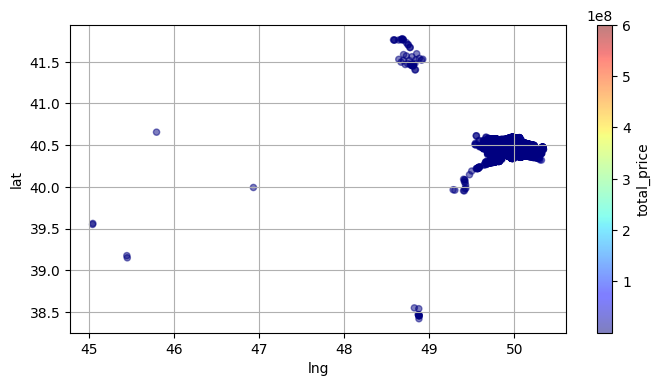

In [ ]:
df.plot(kind = 'scatter', x = 'lng', y = 'lat', alpha = 0.5, c = 'total_price', cmap = plt.get_cmap('jet'), grid = True, figsize = (8, 4))
plt.show()
#Here abracadabra Azerbaijan

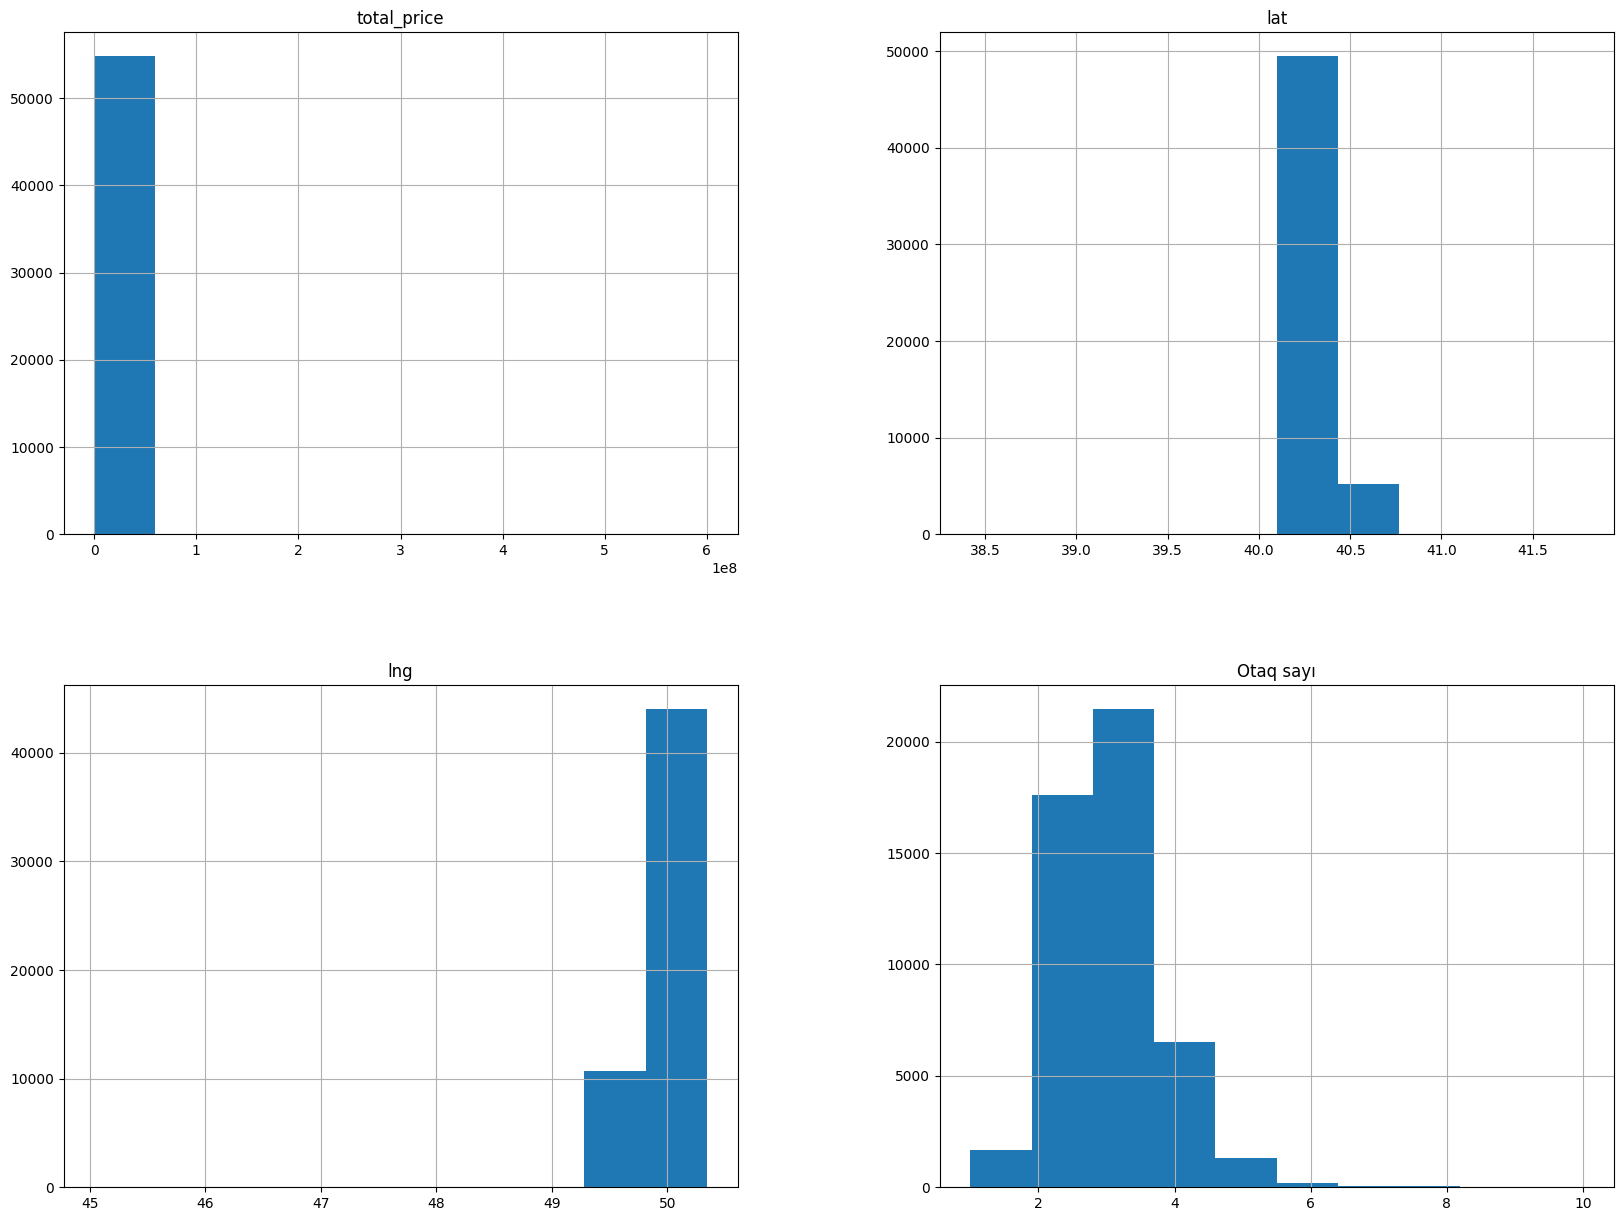

In [ ]:
df.hist(figsize = (20, 15))
plt.show()
#Let's look total price closer

<Axes: >

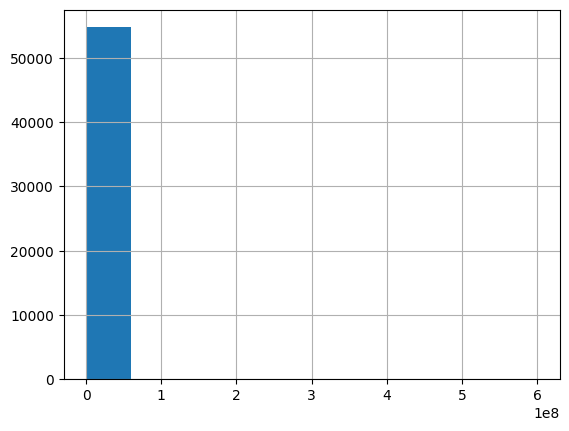

In [ ]:
#As you see here there is big problem in total price column let's see
df['total_price'].hist(bins = 10)

In [ ]:
df['total_price'].describe()

,total_price
count,5.480000e+04
mean,3.382585e+05
std,2.694998e+06
min,1.100000e+01
25%,1.450000e+05
50%,2.100000e+05
75%,3.180000e+05
max,6.000000e+08


In [ ]:
df['Kateqoriya'][df['total_price'] > 2000000].value_counts()
# This numbers are looks so unreal so we consider them as outlier

,count
Kateqoriya,
Obyekt,396
Torpaq,244
Yeni tikili,68
Köhnə tikili,4
Ofis,3


In [ ]:
df = df[df['total_price'] < 2000000] # This column also need log transformation because there is also a little problems

<Axes: >

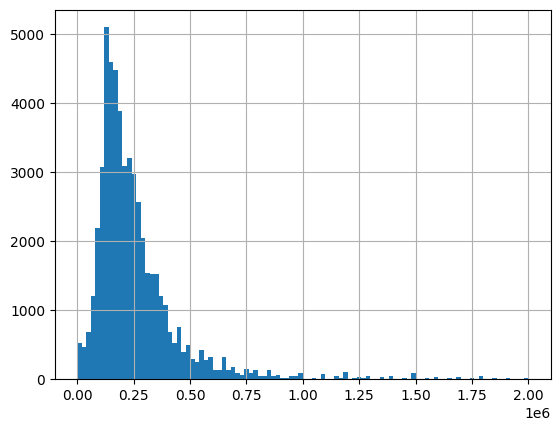

In [ ]:
df['total_price'].hist(bins = 100)

In [ ]:
df['unit_price'].value_counts()
# So let's see this column

,count
unit_price,
2 500 AZN/m²,837
2 000 AZN/m²,723
2 330 AZN/m²,486
2 200 AZN/m²,471
3 000 AZN/m²,467
...,...
797 AZN/m²,1
892 AZN/m²,1
400 AZN/m²,1


In [ ]:
#There is also null values at unit_price column so we will
#fill nulls like this total_price / kvm2
#But fisrt we should delete AZN/m2 and then convert it to float

In [ ]:
df.loc[:, 'unit_price'] = df['unit_price'].str.replace(' AZN/m²', '', regex=False)
df.loc[:, 'unit_price'] = df['unit_price'].str.replace(' ', '', regex=False)
df.loc[:, 'unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')
df.loc[:,'unit_price'] = df['unit_price'].astype(float)


In [ ]:
df.loc[df['unit_price'].isna(), 'Kateqoriya'].value_counts()
# Here again lands do not have extract document so I will delete all Kateqoriya rows which contain Torpaq

,count
Kateqoriya,
Torpaq,3059
Obyekt,2112
Ofis,86
Qaraj,60


In [ ]:
df = df[df['Kateqoriya'] != 'Torpaq']

In [ ]:
#To fill unit_price column we also clean Sahe column let's see

In [ ]:
df['Sahə'].value_counts()

,count
Sahə,
60 m²,2036
100 m²,1733
70 m²,1700
65 m²,1637
80 m²,1636
...,...
77.4 m²,1
116.1 m²,1
147.4 m²,1


In [ ]:
# Remove rows where "Sahə" contains "sot"
df = df[~df['Sahə'].str.contains('sot', na=False)].copy()

# Remove "m²" from "Sahə"
df['Sahə'] = df['Sahə'].str.replace(' m²', '', regex=False)

# Convert "Sahə" to numeric type
df['Sahə'] = pd.to_numeric(df['Sahə'], errors='coerce').astype(float)


In [ ]:
df['Sahə'].value_counts()


,count
Sahə,
60.0,2036
100.0,1733
70.0,1700
65.0,1637
80.0,1636
...,...
77.4,1
116.1,1
147.4,1


In [ ]:
df['Sahə'].describe() #There is outliers also in this column let's see

,Sahə
count,50993.000000
mean,109.754490
std,281.926916
min,4.000000
25%,65.000000
50%,90.000000
75%,128.000000
max,40000.000000


<Axes: >

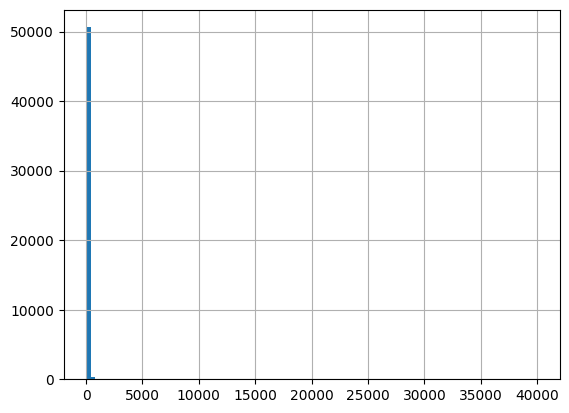

In [ ]:
df['Sahə'].hist(bins = 100)


In [ ]:
df[df['Sahə']> 400]

,location,city,vip,featured,products_label,mortgage,unit_price,total_price,owner_title,lat,lng,Kateqoriya,Mərtəbə,Otaq sayı,Sahə,Təmir,Çıxarış
364,Qala q.,bakı,NaN,NaN,NaN,NaN,NaN,1600000.0,mülkiyyətçi,40.460,50.131,Obyekt,NaN,NaN,1600.0,NaN,var
998,Nəsimi r.,bakı,NaN,NaN,Agentlik,NaN,2100.0,1050000.0,vasitəçi (agent),40.392,49.829,Yeni tikili,13 / 14,5.0,500.0,var,var
1597,20 Yanvar m.,bakı,NaN,NaN,NaN,NaN,482.0,270000.0,vasitəçi (agent),40.409,49.804,Yeni tikili,16 / 16,5.0,560.0,yoxdur,var
1919,Nəriman Nərimanov m.,bakı,vipped,NaN,Agentlik,İpoteka var,1820.0,1000000.0,vasitəçi (agent),40.396,49.876,Yeni tikili,14 / 14,10.0,550.0,var,var
1945,Xaçmaz,xaçmaz,NaN,NaN,NaN,NaN,NaN,100000.0,vasitəçi (agent),41.479,48.830,Obyekt,NaN,NaN,40000.0,var,yoxdur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100436,9-cu mikrorayon q.,bakı,NaN,NaN,Agentlik,İpoteka var,NaN,1000000.0,vasitəçi (agent),40.423,49.810,Obyekt,NaN,NaN,700.0,var,var
100440,Nəsimi m.,bakı,NaN,NaN,Agentlik,İpoteka var,NaN,1200000.0,vasitəçi (agent),40.420,49.825,Obyekt,NaN,NaN,500.0,var,var
100444,Nizami m.,bakı,NaN,NaN,Agentlik,NaN,NaN,1250000.0,vasitəçi (agent),40.378,49.833,Obyekt,NaN,NaN,440.0,var,var
100511,Gənclik m.,bakı,NaN,NaN,Agentlik,NaN,1890.0,1000000.0,vasitəçi (agent),40.398,49.862,Yeni tikili,17 / 18,10.0,530.0,var,var


In [ ]:
df = df[df["Sahə"]< 400]
# They didn't seem logically real so we deleted them

<Axes: >

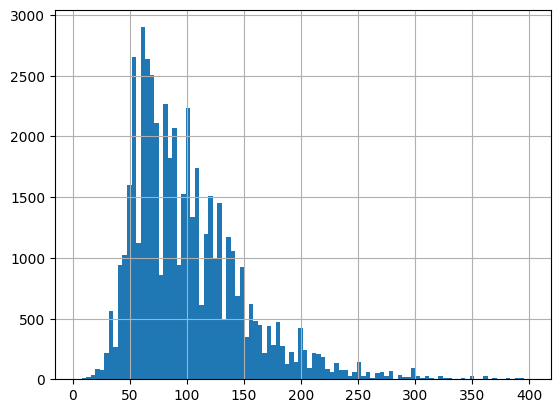

In [ ]:
df['Sahə'].hist(bins = 100)
# This column also need log transformation because, We dont want to delete some datas any more, log transformation will handle this problem

In [ ]:
df['unit_price'].fillna(df['total_price'] / df['Sahə'][df['Sahə'] != 0], inplace=True) #As finally we can fill our unit price column

<ipython-input-52-0b73afd10951>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['unit_price'].fillna(df['total_price'] / df['Sahə'][df['Sahə'] != 0], inplace=True) #As finally we can fill our unit price column
<ipython-input-52-0b73afd10951>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['unit_price'].

In [ ]:
df['unit_price'].describe()

,unit_price
count,50549.000000
mean,2505.464365
std,1054.490931
min,0.123596
25%,1990.000000
50%,2360.000000
75%,2820.000000
max,40000.000000


<Axes: >

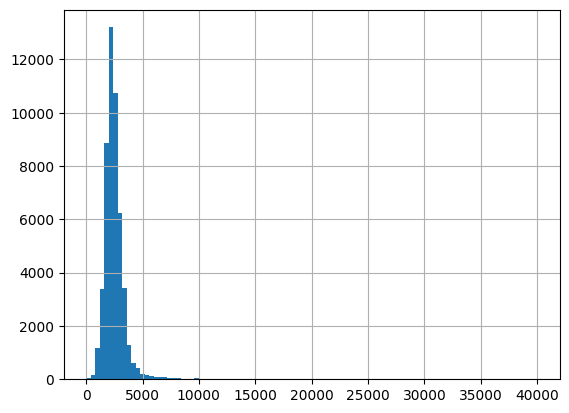

In [ ]:
df['unit_price'].hist(bins = 100) #There is also outliers in this column + need to be log transformation too

In [ ]:
df = df[df['unit_price'] <70000] # We delete some outliers here


In [ ]:
df[df['unit_price']>20000] #As you see here there are a lot of unrealistic values,so i dicided to delete them all

,location,city,vip,featured,products_label,mortgage,unit_price,total_price,owner_title,lat,lng,Kateqoriya,Mərtəbə,Otaq sayı,Sahə,Təmir,Çıxarış
16683,3-cü mikrorayon q.,bakı,NaN,NaN,Agentlik,NaN,23200.000000,278000.0,vasitəçi (agent),40.392,49.829,Yeni tikili,10 / 17,3.0,12.0,var,var
27977,Elmlər Akademiyası m.,bakı,NaN,NaN,NaN,NaN,21166.666667,1270000.0,vasitəçi (agent),40.373,49.817,Obyekt,NaN,NaN,60.0,var,var
52783,Memar Əcəmi m.,bakı,NaN,NaN,NaN,NaN,28700.000000,1750000.0,mülkiyyətçi,40.414,49.814,Yeni tikili,2 / 12,2.0,61.0,var,var
63000,İçəri Şəhər m.,bakı,NaN,NaN,NaN,NaN,40000.000000,280000.0,vasitəçi (agent),40.368,49.832,Obyekt,NaN,NaN,7.0,yoxdur,var
69859,Elmlər Akademiyası m.,bakı,NaN,NaN,NaN,NaN,21875.000000,1750000.0,vasitəçi (agent),40.366,49.817,Obyekt,NaN,NaN,80.0,var,var
75832,Səbail r.,bakı,NaN,NaN,Agentlik,NaN,37500.000000,1800000.0,vasitəçi (agent),40.336,49.822,Obyekt,NaN,NaN,48.0,var,var
75844,Elmlər Akademiyası m.,bakı,NaN,NaN,Agentlik,NaN,22000.000000,1320000.0,vasitəçi (agent),40.381,49.815,Obyekt,NaN,NaN,60.0,var,var
75850,İçəri Şəhər m.,bakı,NaN,NaN,Agentlik,NaN,23275.862069,1350000.0,vasitəçi (agent),40.372,49.834,Obyekt,NaN,NaN,58.0,var,var
75851,Səbail r.,bakı,NaN,NaN,Agentlik,NaN,21818.181818,720000.0,vasitəçi (agent),40.371,49.834,Obyekt,NaN,NaN,33.0,var,var
79431,Əhmədli m.,bakı,NaN,NaN,NaN,İpoteka var,24500.000000,245000.0,vasitəçi (agent),40.385,49.951,Köhnə tikili,8 / 9,5.0,10.0,var,var


In [ ]:
df = df[df['unit_price'] < 20000]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50533 entries, 4 to 100774
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        50533 non-null  object 
 1   city            50533 non-null  object 
 2   vip             2997 non-null   object 
 3   featured        1110 non-null   object 
 4   products_label  37751 non-null  object 
 5   mortgage        17811 non-null  object 
 6   unit_price      50533 non-null  float64
 7   total_price     50533 non-null  float64
 8   owner_title     50218 non-null  object 
 9   lat             50533 non-null  float64
 10  lng             50533 non-null  float64
 11  Kateqoriya      50533 non-null  object 
 12  Mərtəbə         48596 non-null  object 
 13  Otaq sayı       48679 non-null  float64
 14  Sahə            50533 non-null  float64
 15  Təmir           50130 non-null  object 
 16  Çıxarış         50533 non-null  object 
dtypes: float64(6), object(11)
memory us

Now let's look floor column and try to fix it

In [ ]:
df['Mərtəbə'].value_counts()  # As I said before we will divide this coloumn into 2 parts

,count
Mərtəbə,
5 / 5,1334
2 / 5,1188
3 / 5,1187
4 / 5,1099
8 / 9,887
...,...
5 / 28,1
20 / 25,1
18 / 26,1


In [ ]:
df[['current_floor', 'max_floor']] = df['Mərtəbə'].str.split(' /', expand=True)

df['current_floor'] = pd.to_numeric(df['current_floor'], errors='coerce')
df['max_floor'] = pd.to_numeric(df['max_floor'], errors='coerce')

<ipython-input-60-fbbe8ac3e05d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['current_floor', 'max_floor']] = df['Mərtəbə'].str.split(' /', expand=True)
<ipython-input-60-fbbe8ac3e05d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['current_floor', 'max_floor']] = df['Mərtəbə'].str.split(' /', expand=True)
<ipython-input-60-fbbe8ac3e05d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [ ]:
df.drop(columns = 'Mərtəbə', axis = 1, inplace = True)

<Axes: >

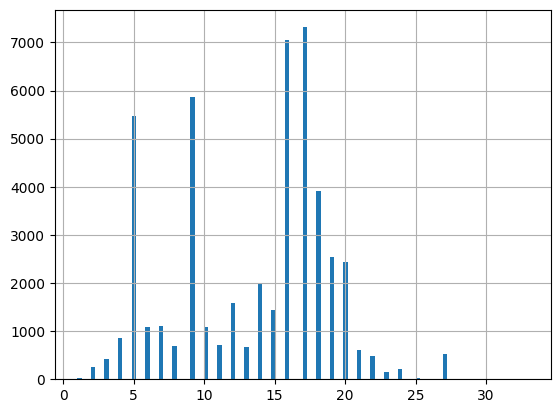

In [ ]:
df['max_floor'].hist(bins = 100)

<Axes: >

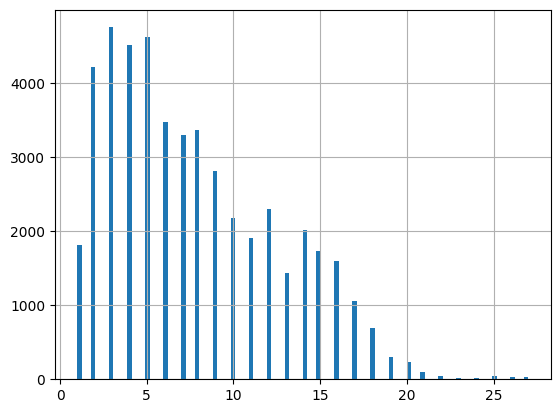

In [ ]:
df['current_floor'].hist(bins = 100)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50533 entries, 4 to 100774
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        50533 non-null  object 
 1   city            50533 non-null  object 
 2   vip             2997 non-null   object 
 3   featured        1110 non-null   object 
 4   products_label  37751 non-null  object 
 5   mortgage        17811 non-null  object 
 6   unit_price      50533 non-null  float64
 7   total_price     50533 non-null  float64
 8   owner_title     50218 non-null  object 
 9   lat             50533 non-null  float64
 10  lng             50533 non-null  float64
 11  Kateqoriya      50533 non-null  object 
 12  Otaq sayı       48679 non-null  float64
 13  Sahə            50533 non-null  float64
 14  Təmir           50130 non-null  object 
 15  Çıxarış         50533 non-null  object 
 16  current_floor   48596 non-null  float64
 17  max_floor       48596 non-null  flo

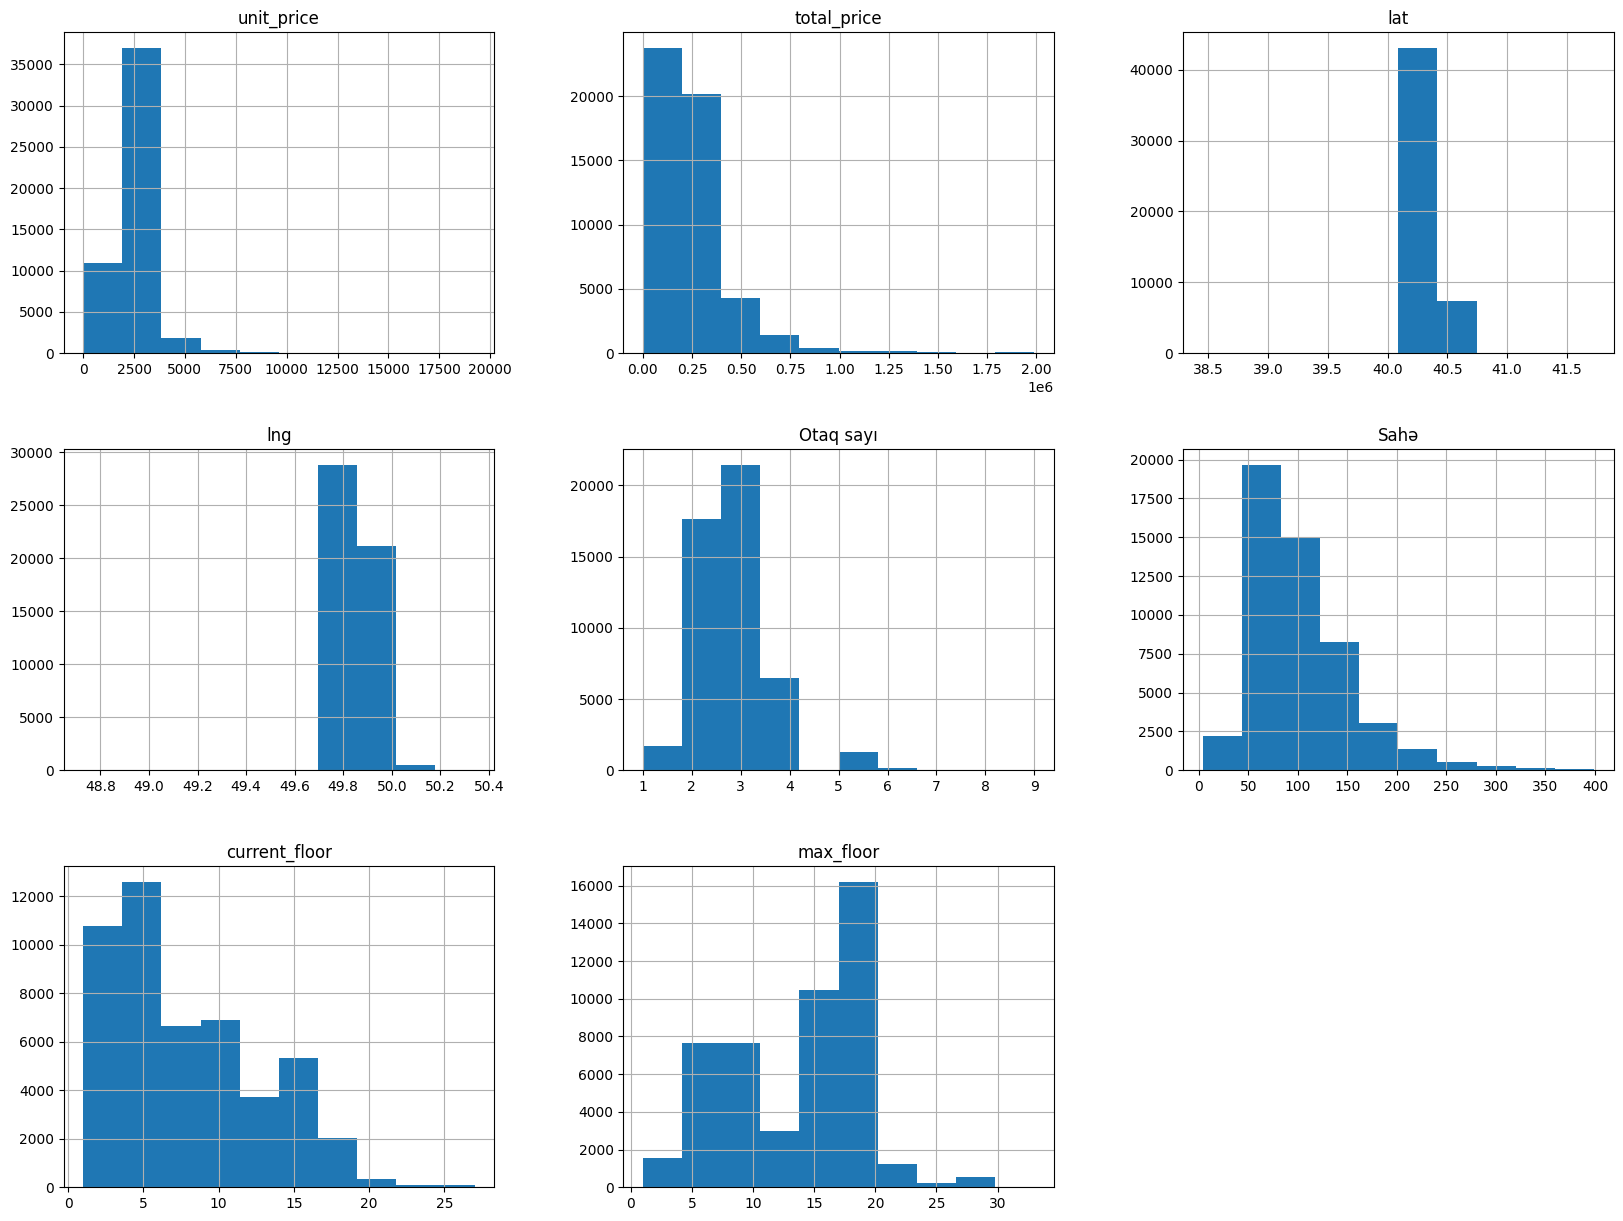

In [ ]:
df.hist(figsize = (20, 15))
plt.show()

#Encoding

In [ ]:
df[df['Təmir'].isna()] # We were trying to find how to fill and encode this column
#Logically null values are tend to be filled with 'yoxdur' value so i will do this

,location,city,vip,featured,products_label,mortgage,unit_price,total_price,owner_title,lat,lng,Kateqoriya,Otaq sayı,Sahə,Təmir,Çıxarış,current_floor,max_floor
10,Masazır q.,bakı,NaN,NaN,NaN,NaN,2916.666667,1050000.0,mülkiyyətçi,40.482,49.756,Obyekt,NaN,360.0,NaN,yoxdur,NaN,NaN
1044,Xətai r.,bakı,NaN,NaN,Agentlik,NaN,2120.000000,127000.0,vasitəçi (agent),40.362,49.948,Yeni tikili,2.0,60.0,NaN,var,7.0,9.0
1136,Neftçilər m.,bakı,NaN,NaN,NaN,NaN,819.444444,29500.0,mülkiyyətçi,40.414,49.943,Qaraj,NaN,36.0,NaN,var,NaN,NaN
2826,Qara Qarayev m.,bakı,NaN,NaN,NaN,İpoteka var,2360.000000,319000.0,vasitəçi (agent),40.421,49.937,Yeni tikili,4.0,135.0,NaN,var,15.0,17.0
3007,8 Noyabr m.,bakı,NaN,NaN,Agentlik,İpoteka var,2210.000000,309000.0,vasitəçi (agent),40.398,49.818,Yeni tikili,3.0,140.0,NaN,var,10.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99291,Əhmədli q.,bakı,NaN,NaN,NaN,İpoteka var,2240.000000,123000.0,vasitəçi (agent),40.363,49.948,Köhnə tikili,2.0,55.0,NaN,var,6.0,9.0
99821,Nərimanov r.,bakı,NaN,NaN,Agentlik,NaN,1870.000000,290000.0,vasitəçi (agent),40.390,49.856,Yeni tikili,3.0,155.0,NaN,var,7.0,16.0
100152,Sahil m.,bakı,NaN,NaN,NaN,NaN,2000.000000,70000.0,vasitəçi (agent),40.372,49.844,Qaraj,NaN,35.0,NaN,var,NaN,NaN
100254,Nərimanov r.,bakı,NaN,NaN,NaN,NaN,2280.000000,205000.0,vasitəçi (agent),40.411,49.846,Yeni tikili,3.0,90.0,NaN,var,3.0,9.0


In [ ]:
df['Təmir'][df['Təmir'] == 'var'] = '1'
df['Təmir'].fillna('yoxdur', inplace = True)
df['Təmir'][df['Təmir'] == 'yoxdur'] = '0'
df['Təmir'] = df['Təmir'].astype(int)
df['Təmir'].value_counts()

<ipython-input-67-bbaa3e09fd24>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Təmir'][df['Təmir'] == 'var'] = '1'
<ipython-input-67-bbaa3e09fd24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,count
Təmir,
1,42598
0,7935


In [ ]:
df['vip'][df['vip'] == 'vipped'] = '1' #Encoding vipped with 1 and null values with 0 binary encoding
df['vip'].fillna('0', inplace = True)
df['vip'] = df['vip'].astype(int)
df['vip'].value_counts()

<ipython-input-68-30082eef5a17>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['vip'][df['vip'] == 'vipped'] = '1' #Encoding vipped with 1 and null values with 0 binary encoding
<ipython-input-68-30082eef5a17>:1: SettingWithCopyWarning:

,count
vip,
0,47536
1,2997


In [ ]:
df['featured'][df['featured'] == 'featured'] = '1' #Same story for featured column
df['featured'].fillna('0', inplace = True)
df['featured'] = df['featured'].astype(int)
df['featured'].value_counts()

<ipython-input-69-b11baaba668a>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['featured'][df['featured'] == 'featured'] = '1' #Same story for featured column
<ipython-input-69-b11baaba668a>:1: SettingWithCopyWarning: 
A value is trying

,count
featured,
0,49423
1,1110


In [ ]:
df['mortgage'][df['mortgage'] == 'İpoteka var'] = '1'
df['mortgage'].fillna('0', inplace = True)
df['mortgage'] = df['mortgage'].astype(int)
df['mortgage'].value_counts()

<ipython-input-70-7c82370d4d97>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['mortgage'][df['mortgage'] == 'İpoteka var'] = '1'
<ipython-input-70-7c82370d4d97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,count
mortgage,
0,32722
1,17811


In [ ]:
df['Çıxarış'][df['Çıxarış'] == 'var'] = '1'
df['Çıxarış'][df['Çıxarış'] == 'yoxdur'] = '0'
df['Çıxarış'] = df['Çıxarış'].astype(int)
df['Çıxarış'].value_counts()

<ipython-input-71-71ccef35f842>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Çıxarış'][df['Çıxarış'] == 'var'] = '1'
<ipython-input-71-71ccef35f842>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,count
Çıxarış,
1,39475
0,11058


In [ ]:
#We also use frequency encoding for location column
df['location'] = df['location'].map(df['location'].value_counts() / len(df) * 100) #frequency encoding
df['location'].value_counts()

,count
location,
6.518513,3294
6.069301,3067
5.378663,2718
5.202541,2629
5.024439,2539
...,...
0.033641,17
0.015831,16
0.025726,13


In [ ]:
df.shape

(50533, 18)

#Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

# Custom Log Transform Function
def log_transform(X):
    return np.log(X + 1)

# Define custom FunctionTransformer to handle get_feature_names_out()
class CustomFunctionTransformer(FunctionTransformer):
    def get_feature_names_out(self, input_features=None):
        return input_features  # Returns the same feature names as input


scaler_pipeline = make_pipeline(
    StandardScaler()
)

label_pipeline = make_pipeline(
    OrdinalEncoder()
)

constant_pipeline_a = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='a'),
    OrdinalEncoder()  # Encode with labels
)

constant_pipeline0 = make_pipeline(
    SimpleImputer(strategy='constant', fill_value=0),
    StandardScaler()
)

constant_pipeline1 = make_pipeline(
    SimpleImputer(strategy='constant', fill_value=1),
    StandardScaler()
)

log_pipeline = make_pipeline(
    CustomFunctionTransformer(log_transform),  # Apply log transformation
    StandardScaler()
)

# Adding columns that don't need transformation
extra_columns_pipeline = make_pipeline(
    SimpleImputer(strategy='constant', fill_value=0)  # Example: filling NaN values with 'no'
)

# ColumnTransformer to apply all pipelines
preprocessing = ColumnTransformer([
    ('scaler', scaler_pipeline, ['location', 'lat', 'lng']),
    ('label', label_pipeline, ['city']),
    ('constant_a', constant_pipeline_a, ['Kateqoriya', 'owner_title', 'products_label']),
    ('constant_0', constant_pipeline0, ['Otaq sayı']),
    ('constant_1', constant_pipeline1, ['current_floor', 'max_floor']),
    ('log', log_pipeline, ['unit_price', 'total_price', 'Sahə']),
    # New columns that don’t need much transformation
    ('extra_columns', extra_columns_pipeline, ['vip', 'featured', 'mortgage', 'Təmir', 'Çıxarış'])
])

df_transformed = preprocessing.fit_transform(df)

# Manually create column names based on each transformer
scaler_columns = ['location', 'lat', 'lng']
label_columns = ['city']
constant_a_columns = ['Kateqoriya', 'owner_title', 'products_label']
constant_0_columns = ['Otaq sayı']
constant_1_columns = ['current_floor', 'max_floor']
log_columns = ['unit_price', 'total_price', 'Sahə']
extra_columns = ['vip', 'featured', 'mortgage', 'Təmir', 'Çıxarış']

# Combine all column names into one list
all_columns = scaler_columns + label_columns + constant_a_columns + constant_0_columns + constant_1_columns + log_columns + extra_columns

# Create a DataFrame with proper column names
df_final = pd.DataFrame(df_transformed, columns=all_columns)

df_final.head()


,location,lat,lng,city,Kateqoriya,owner_title,products_label,Otaq sayı,current_floor,max_floor,unit_price,total_price,Sahə,vip,featured,mortgage,Təmir,Çıxarış
0,-0.476009,-0.163566,1.430050,1.0,4.0,2.0,0.0,0.339152,1.516101,0.515393,-0.206559,0.038834,0.195071,0.0,0.0,0.0,1.0,1.0
1,-1.250067,-0.691888,-0.376158,1.0,0.0,2.0,2.0,1.352656,-0.916918,-1.534027,2.223719,1.929255,0.760543,0.0,0.0,0.0,1.0,1.0
2,-0.581515,2.366818,-1.635951,1.0,1.0,1.0,2.0,-2.701360,-1.322421,-2.046382,0.628102,2.766105,2.964538,0.0,0.0,0.0,0.0,0.0
3,-0.276488,0.587207,1.065773,1.0,1.0,1.0,2.0,-2.701360,-1.322421,-2.046382,2.817824,0.428216,-1.514931,0.0,0.0,1.0,1.0,1.0
4,-0.462429,0.364756,1.202377,1.0,0.0,2.0,2.0,0.339152,-0.714166,-1.363242,-0.288402,-0.629480,-0.571223,0.0,0.0,0.0,1.0,1.0


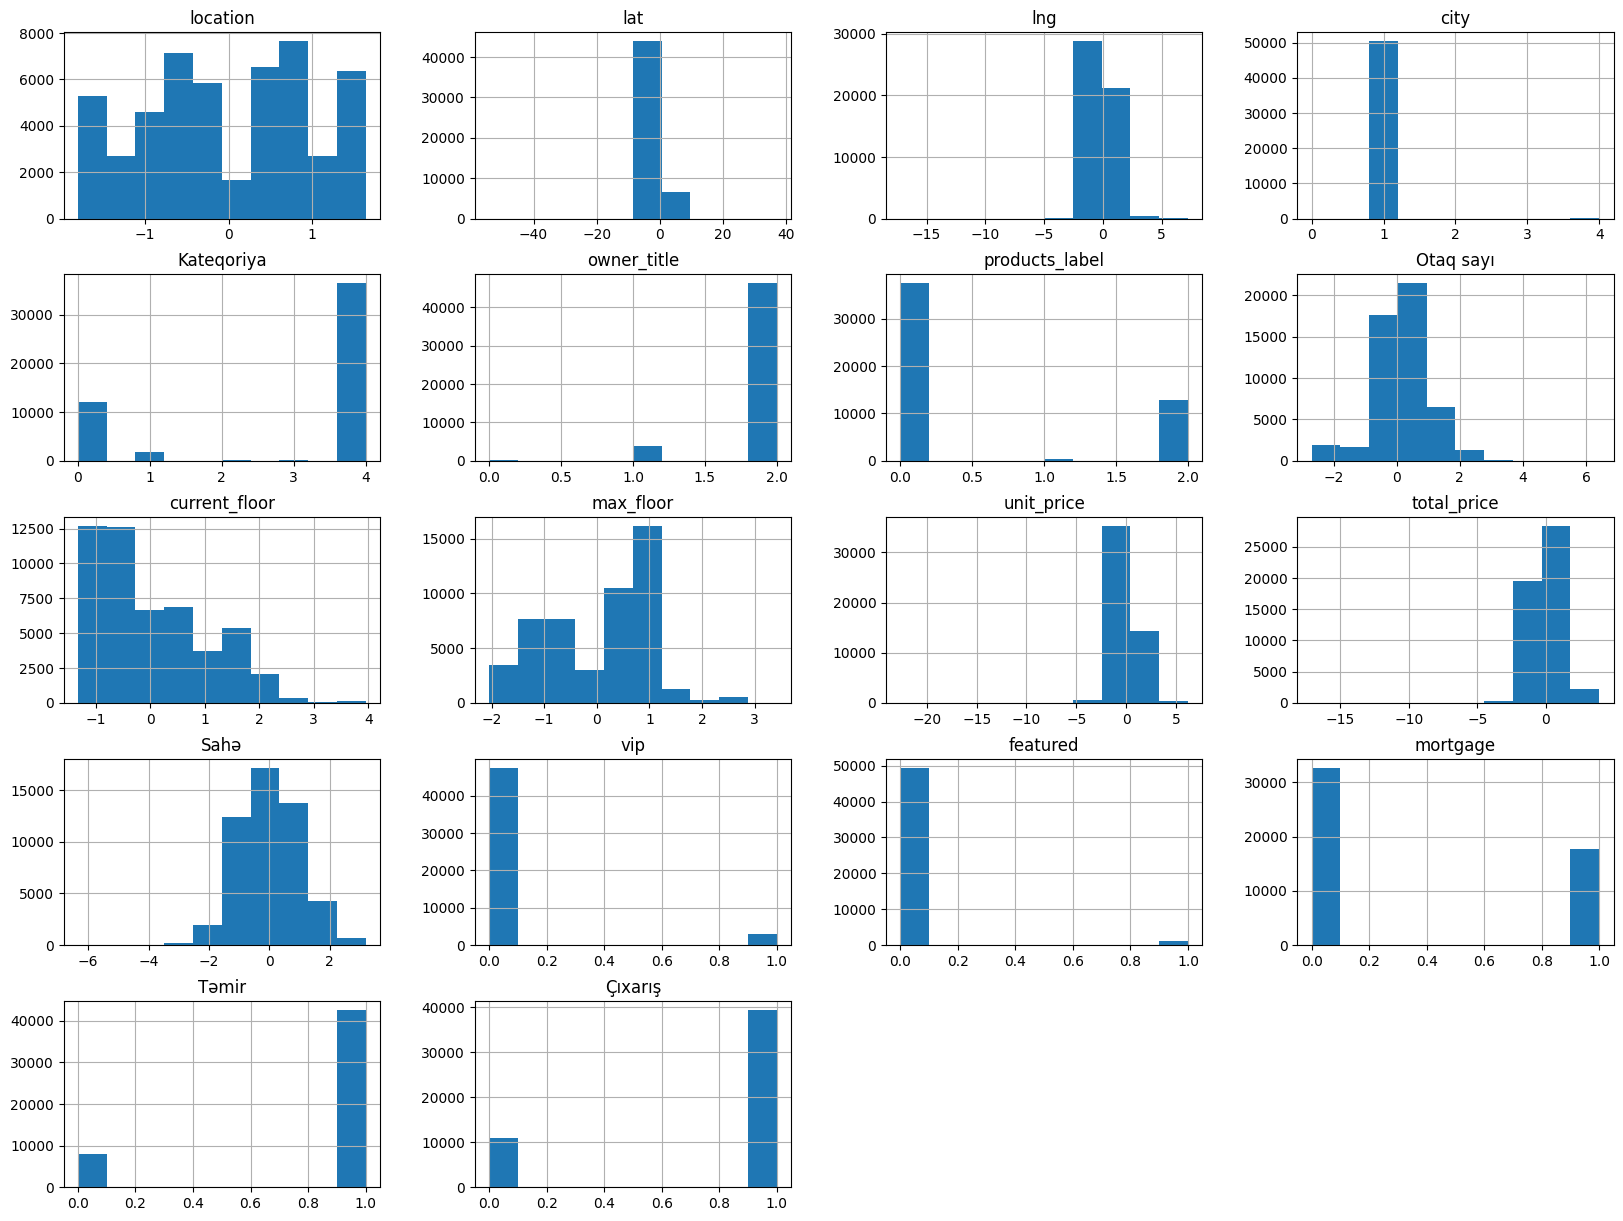

In [ ]:
df_final.hist(figsize = (20, 15))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df_final.drop('Çıxarış', axis=1)
y = df_final['Çıxarış']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40426, 17), (10107, 17), (40426,), (10107,))

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50533 entries, 0 to 50532
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        50533 non-null  float64
 1   lat             50533 non-null  float64
 2   lng             50533 non-null  float64
 3   city            50533 non-null  float64
 4   Kateqoriya      50533 non-null  float64
 5   owner_title     50533 non-null  float64
 6   products_label  50533 non-null  float64
 7   Otaq sayı       50533 non-null  float64
 8   current_floor   50533 non-null  float64
 9   max_floor       50533 non-null  float64
 10  unit_price      50533 non-null  float64
 11  total_price     50533 non-null  float64
 12  Sahə            50533 non-null  float64
 13  vip             50533 non-null  float64
 14  featured        50533 non-null  float64
 15  mortgage        50533 non-null  float64
 16  Təmir           50533 non-null  float64
dtypes: float64(17)
memory usage: 6.

In [ ]:
y_train.value_counts() #Here we can see we are going to handle with imbalance data
#Firstly I will use class weighting using randomForest

,count
Çıxarış,
1.0,31582
0.0,8844


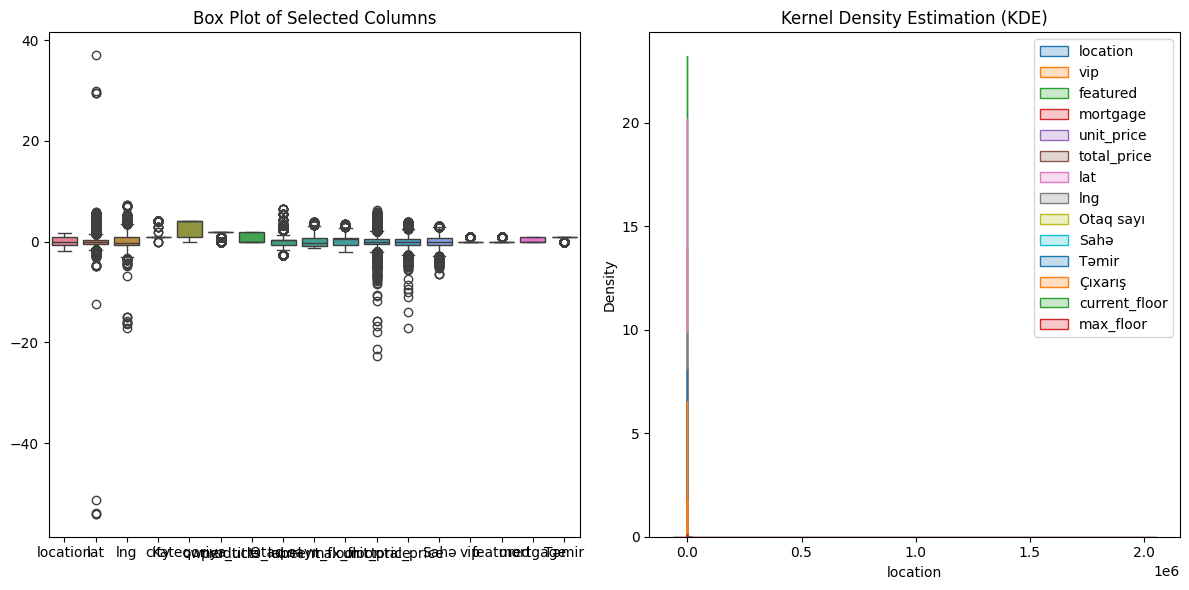

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Create box plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=X)
plt.title("Box Plot of Selected Columns")

# Create KDE plots (Ensure numeric conversion)
plt.subplot(1, 2, 2)
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Check if column is numeric
        sns.kdeplot(df[column], label=column, fill=True)

plt.title("Kernel Density Estimation (KDE)")
plt.legend()

plt.tight_layout()
plt.show()


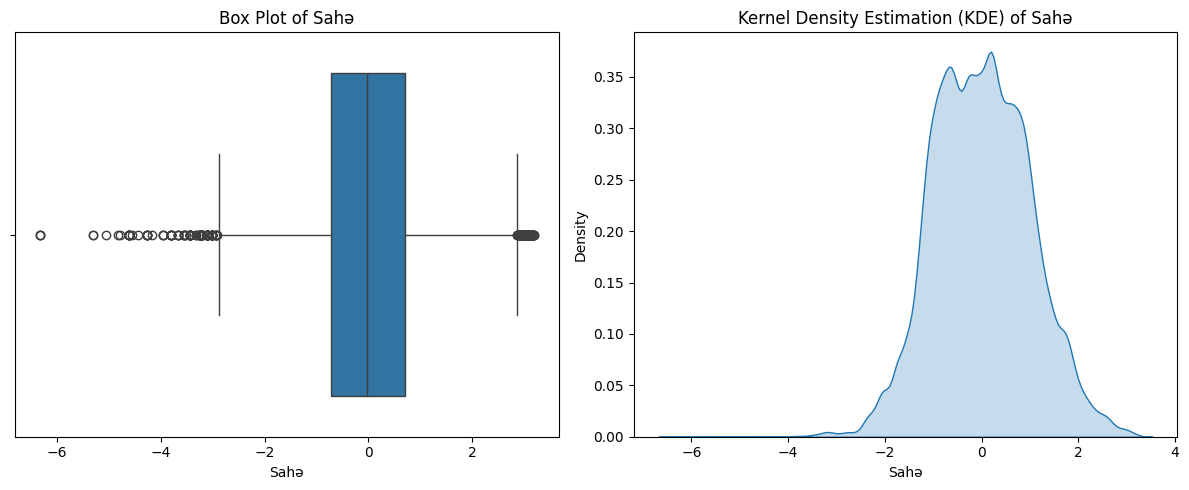

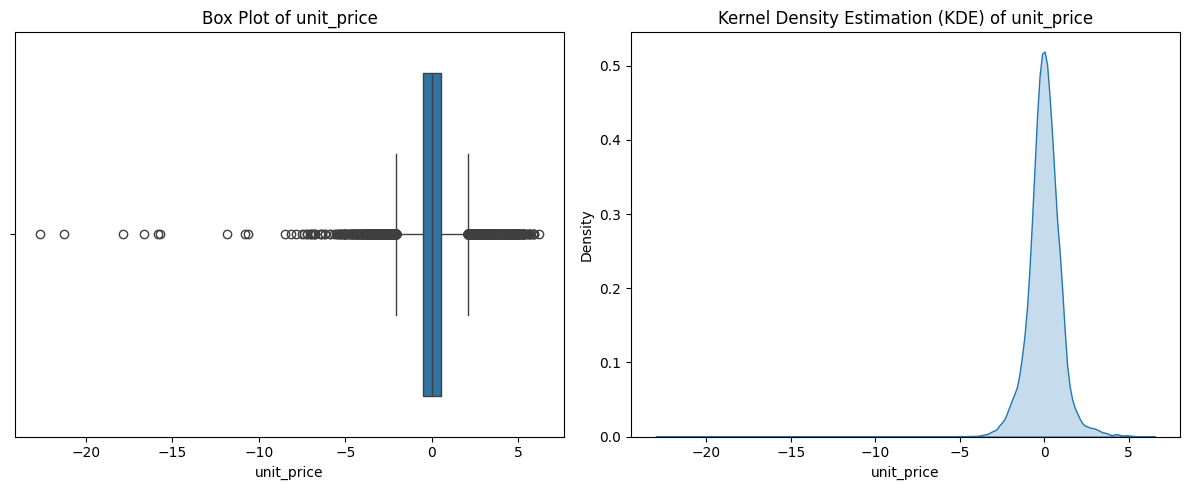

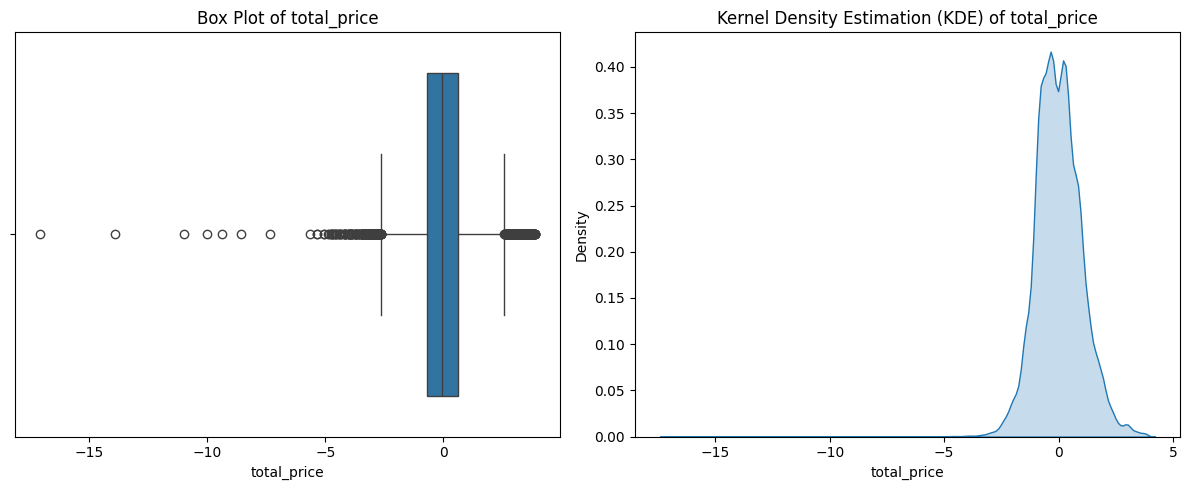

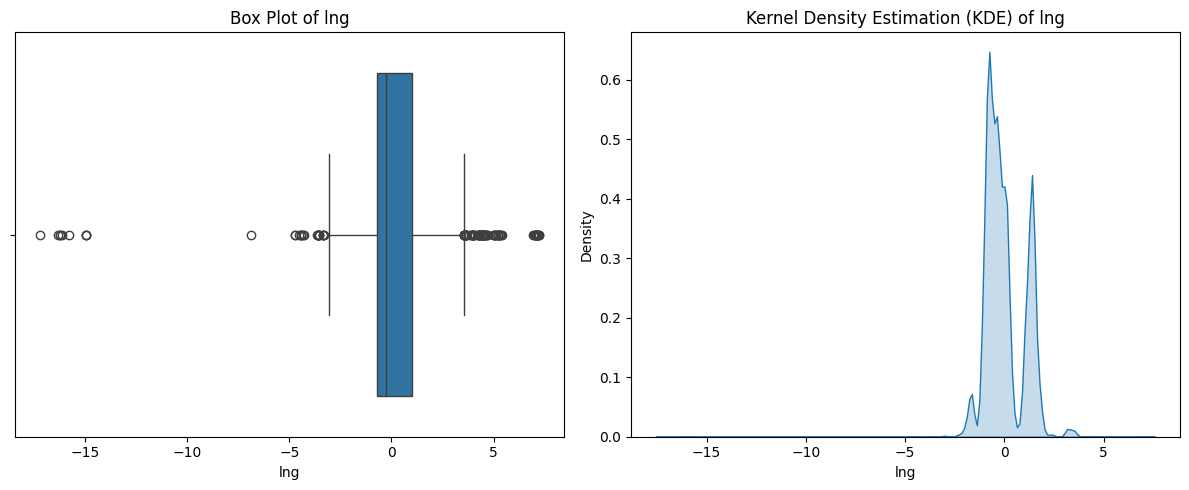

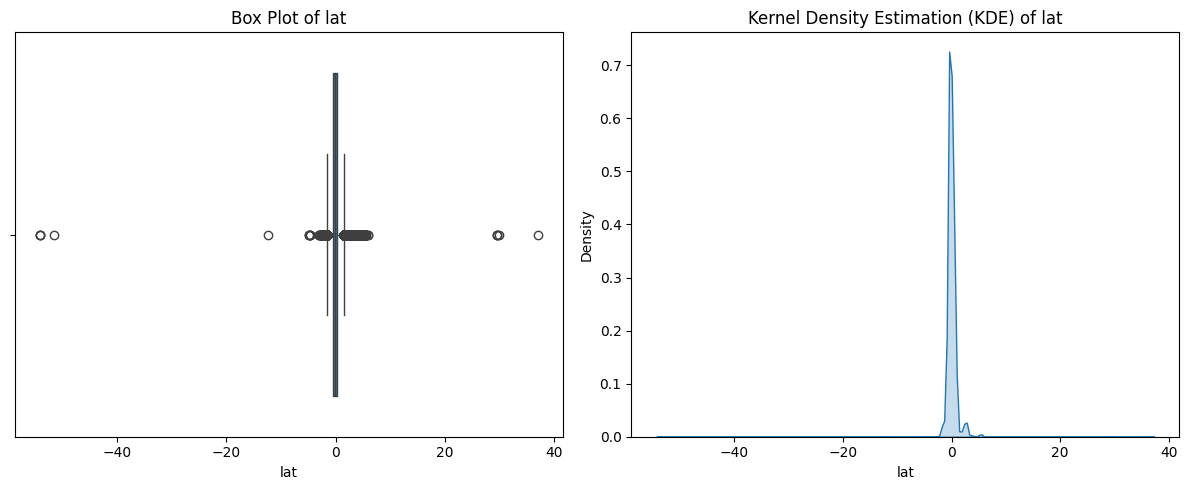

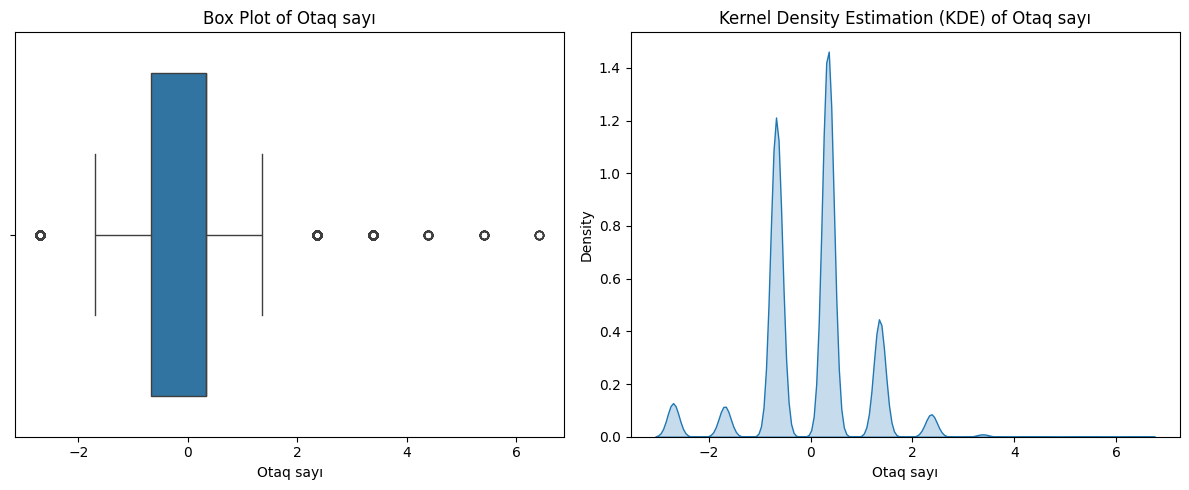

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the columns you want to visualize
columns_to_plot = ["Sahə", "unit_price", "total_price", "lng", "lat", "Otaq sayı"]

# Loop through selected columns and plot separately
for column in columns_to_plot:
    plt.figure(figsize=(12, 5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=X[column])
    plt.title(f"Box Plot of {column}")

    # KDE plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(X[column], fill=True)
    plt.title(f"Kernel Density Estimation (KDE) of {column}")

    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Define columns to check for outliers
columns_to_clean = ["Sahə", "unit_price", "total_price", "lng", "lat", "Otaq sayı"]

# Compute the Z-score
z_scores = np.abs((X[columns_to_clean] - X[columns_to_clean].mean()) / X[columns_to_clean].std())

# Set a threshold (commonly 3)
threshold = 3

# Keep only rows where all selected columns have Z-scores within the threshold
X_cleaned = X[(z_scores < threshold).all(axis=1)]

print(f"Original shape: {X.shape}")
print(f"New shape after outlier removal: {X_cleaned.shape}")


Original shape: (50533, 17)
New shape after outlier removal: (48527, 17)


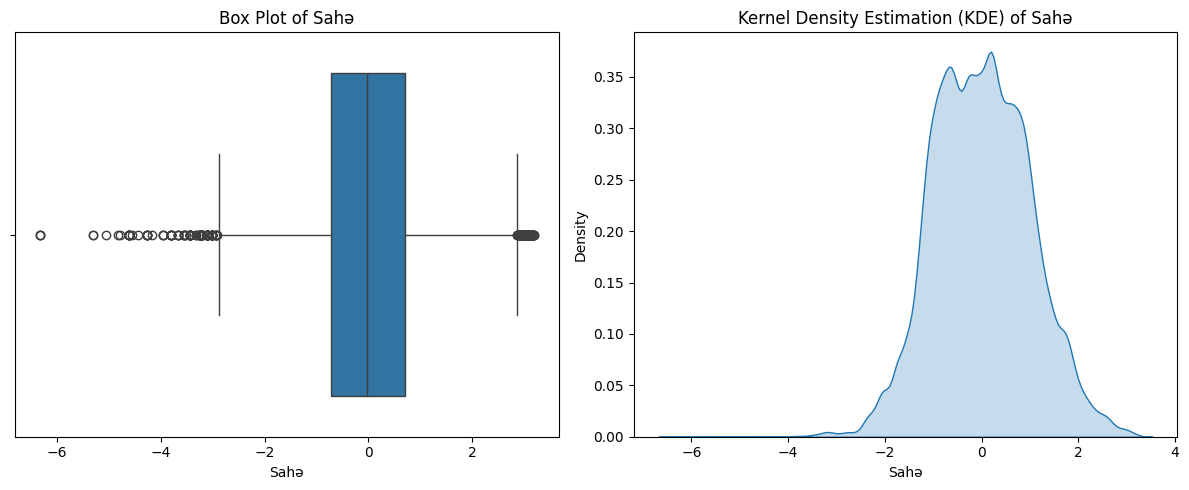

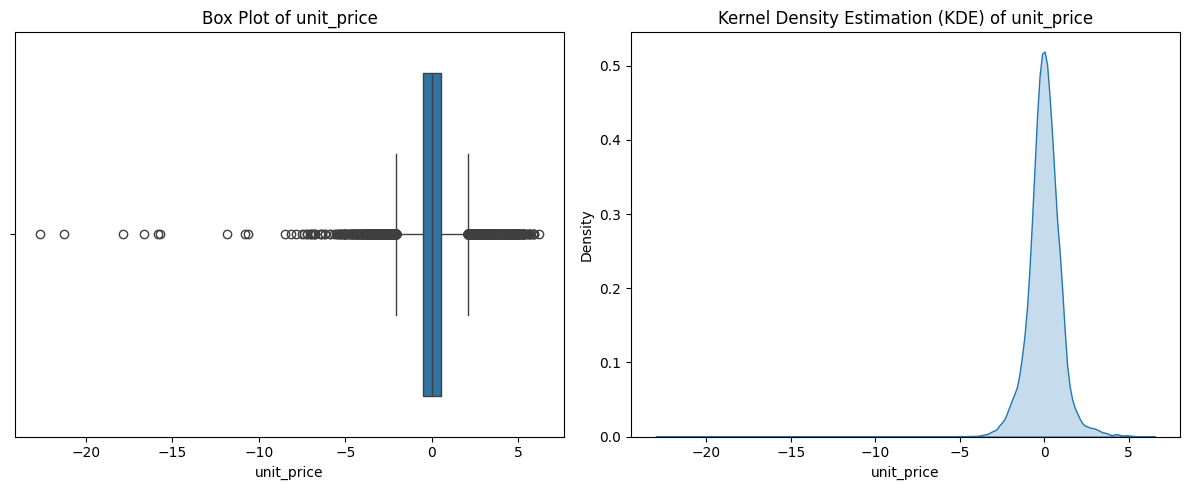

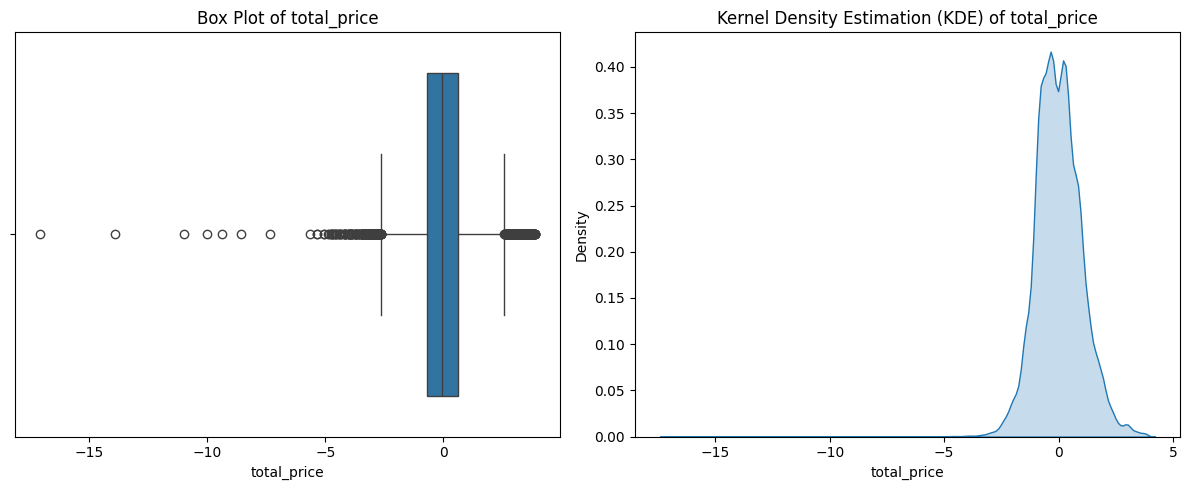

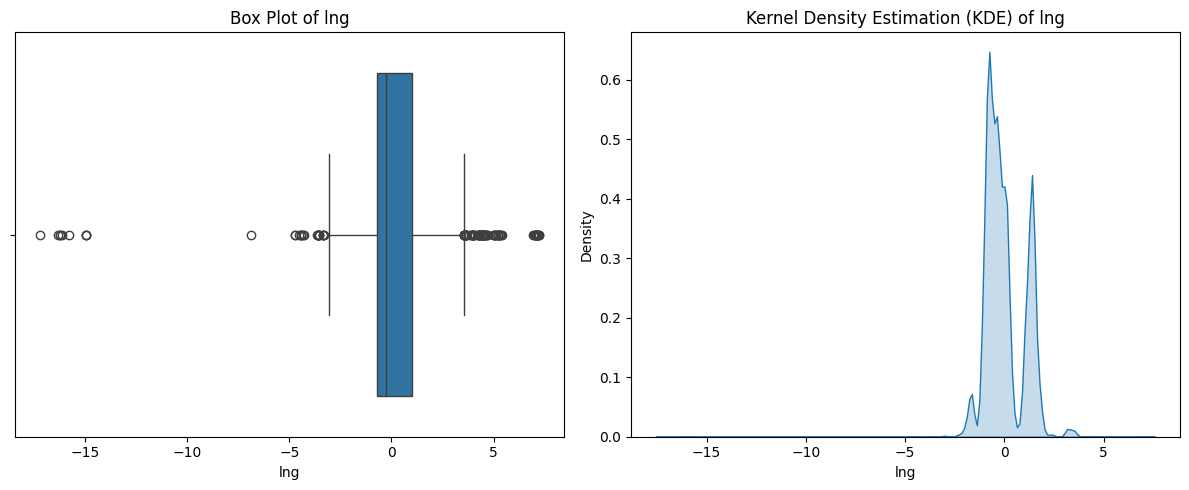

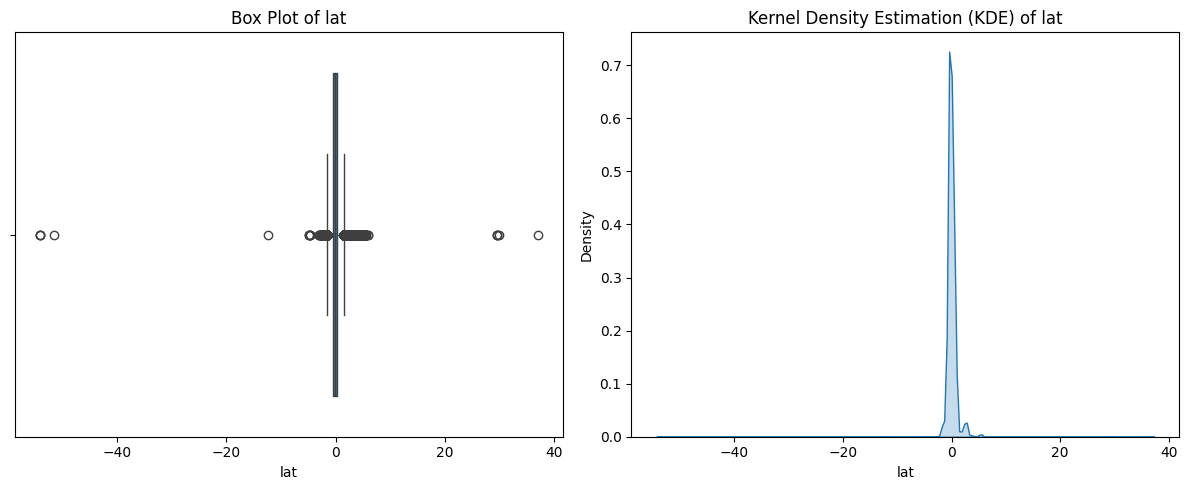

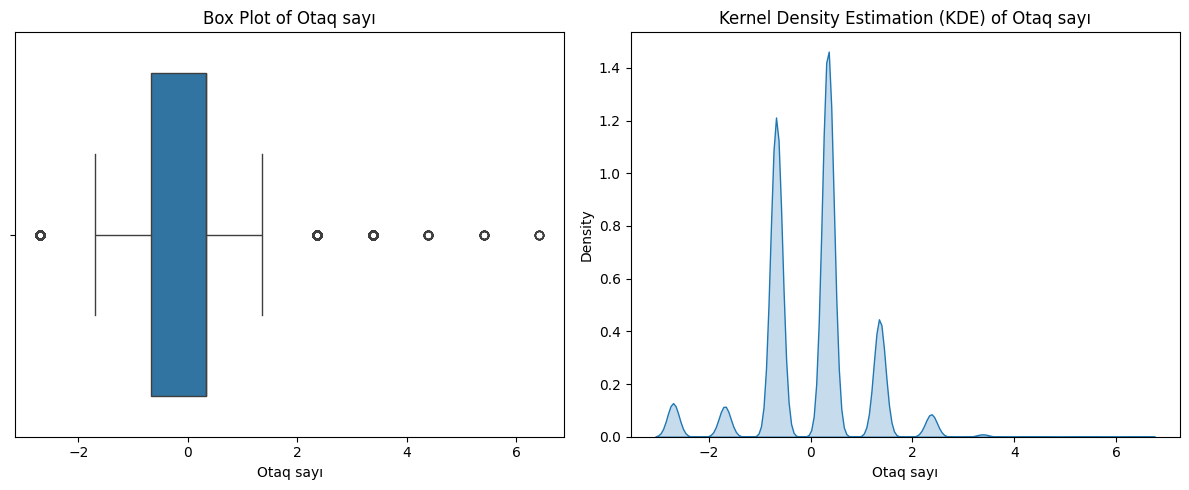

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the columns you want to visualize
columns_to_plot = ["Sahə", "unit_price", "total_price", "lng", "lat", "Otaq sayı"]

# Loop through selected columns and plot separately
for column in columns_to_plot:
    plt.figure(figsize=(12, 5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=X[column])
    plt.title(f"Box Plot of {column}")

    # KDE plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(X[column], fill=True)
    plt.title(f"Kernel Density Estimation (KDE) of {column}")

    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_random = RandomForestClassifier(class_weight='balanced', random_state=42)
model_random.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
model_random.score(X_test, y_test) #Random forest handle problem quiete good let's see its cross_val score

0.9103591570198872

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model_random, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.89781834, 0.89944341, 0.90337662])

In [ ]:
from sklearn.model_selection import cross_val_predict #Let's see model's predictions

y_train_pred = cross_val_predict(model_random, X_train, y_train, cv = 3)

In [ ]:
#So I evaluate first model using accuracy metric let's see another metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_pred)
cm

array([[ 6394,  2450],
       [ 1584, 29998]])

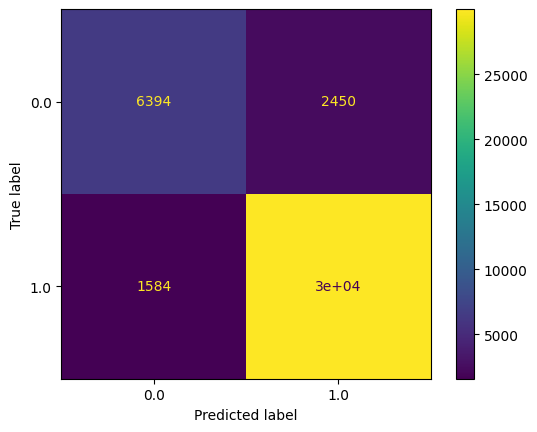

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"Precision: {precision_score(y_train, y_train_pred)}")
print(f"Recall: {recall_score(y_train, y_train_pred)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred)}")

Precision: 0.9244945759368837
Recall: 0.949844848331328
F1 Score: 0.9369982820552866


In [ ]:
y_preds = cross_val_predict (model_random, X_train, y_train,method = 'predict_proba',cv = 3)
y_preds =  y_preds[:,1 ]
y_preds


array([0.94, 0.92, 0.31, ..., 0.  , 0.63, 0.3 ])

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_preds)

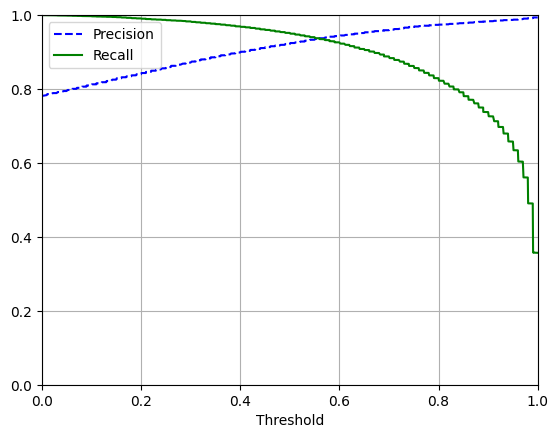

In [ ]:
plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision') #Precision recall
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend()

plt.axis([0, 1, 0, 1])
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve #ROC curve

fpr, tpr, thresholds_roc = roc_curve(y_train, y_preds)

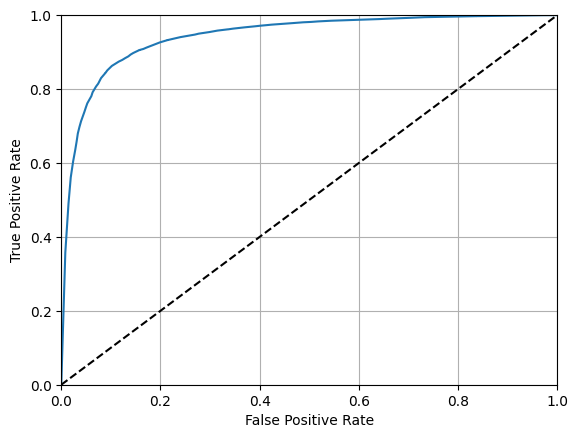

In [ ]:
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.axis([0,1,0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

In [ ]:
#Lets try to adjust decision threshold
#In this problem i thought precision should be high

idx_for_90_precision = (precisions >= 0.95).argmax()
idx_for_90_precision

402

In [ ]:
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

0.6408537379997393

In [ ]:
y_train_pred_90 = (y_preds >= threshold_for_90_precision)
y_train_pred_90

array([ True,  True, False, ..., False, False, False])

In [ ]:
precision_score(y_train, y_train_pred_90)

0.9514524472741743

In [ ]:
recall_score(y_train, y_train_pred_90)

0.9084921790893546

In [ ]:
f1_score(y_train, y_train_pred_90)

0.9294761735074023

Till here i have tried to encrese precesion, but it can be changeable for the situation of problem

Let's try another model

In [ ]:
from sklearn.linear_model import LogisticRegression  #So this looks a little bit funny because i should use first this model as base model :)

model_log = LogisticRegression(class_weight='balanced', random_state=42)

model_log.fit(X_train, y_train)


predictions = model_log.predict(X_test)

model_log.score(X_test, y_test)

0.7451271396062135

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model_log, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.74332146, 0.74679035, 0.74627087])

In [ ]:
from sklearn.model_selection import cross_val_predict #Let's see model's another metrics

y_train_pred = cross_val_predict(model_log, X_train, y_train, cv = 3)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"Precision: {precision_score(y_train, y_train_pred)}")
print(f"Recall: {recall_score(y_train, y_train_pred)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred)}")

Precision: 0.9749710002676898
Recall: 0.6919447786713951
F1 Score: 0.8094303281724572


#Hyperparameter tuning for RandomForest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


model_random = RandomForestClassifier(class_weight='balanced', random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2',None],
    'bootstrap': [True, False]  # Whether to use bootstrap samples for building trees
}


grid_search = GridSearchCV(estimator=model_random, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Best score achieved
print(f"Best cross-validation score: {grid_search.best_score_}")

# Use the best model found from grid search for predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)


accuracy = best_model.score(X_test, y_test)
print(f'Accuracy on test data: {accuracy}')


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


KeyboardInterrupt: 

#Ensemble Learning

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=200, min_samples_leaf = 1, min_samples_split =5,
                                             bootstrap = False,max_features = 'sqrt', random_state=42)),
    ('logistic_regression', LogisticRegression()),
    ('svc', SVC(probability=True))
]

# Define the meta-model (final estimator)
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)


stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)


stacking_model.fit(X_train, y_train)


y_pred = stacking_model.predict(X_test)


stacking_model.score(X_test,y_test)


0.9048184426635005